In [ ]:
import os
import math
import numpy as np
from scipy import signal, stats
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import statistics
import time
import pickle
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
import librosa
import soundfile as sf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')
indices_escogidos=['BETA','P','M','NP','BNF','MD','SF','RMS','CF','SC','SNR']
from sklearn import metrics
import os
import math
import numpy as np
from scipy import signal, stats
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import statistics
import time
import pickle
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
import librosa
import soundfile as sf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')
from sklearn import metrics
from numpy import linalg as LA
from scipy.spatial import distance
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from copy import deepcopy
from matplotlib.pyplot import figure

In [ ]:
!pip install rasterio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 30.9 MB/s eta 0:00:00


# Correlation bwtn Acoustic indices and Clusters prototypes

In [ ]:
import pandas as pd
from scipy.stats import kruskal, spearmanr

def calculate_correlation_kruskal(df_merged,buffer_values_df, columns_to_correlate, columns_to_correlate_with):
    correlation_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    h_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)
    p_value_df = pd.DataFrame(index=columns_to_correlate, columns=columns_to_correlate_with, dtype=float)

    for i in columns_to_correlate:
        for j in columns_to_correlate_with:
            # Get the values from df_merged and buffer_values_df for columns i and j
            values_i = df_merged[i]
            values_j = buffer_values_df[j]

            # Calculate Spearman rank correlation coefficient
            correlation_coefficient, _ = spearmanr(values_i, values_j)
            correlation_df.at[i, j] = correlation_coefficient

            # Perform Kruskal-Wallis test
            h_value, p_value = kruskal(values_i, values_j)
            h_value_df.at[i, j] = h_value
            p_value_df.at[i, j] = p_value

    return correlation_df, h_value_df, p_value_df

#### 8-17 period

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Septiembre/mergeresults/0817.csv')

In [ ]:
df

,Unnamed: 0,site,EPS,BGNf,Hf,NDSI,rBA,ADI,AEI,pred,component1_prob,component2_prob,component3_prob,XCOORD.y_x,YCOORD.y_x
0,0,RZUA01,0.194328,0.623490,0.496349,0.875996,0.154405,0.998286,0.041303,2,0.000000e+00,0.0,1.000000e+00,4954301.250,1950942.625
1,3,RZUA03b,0.150198,1.000000,0.705350,0.598525,0.037105,0.868612,0.361077,0,1.000000e+00,0.0,9.668182e-18,4954301.247,1950142.624
2,4,RZUA04,0.037002,0.535689,0.771754,0.604549,0.038013,0.998769,0.034331,2,6.678233e-09,0.0,1.000000e+00,4954301.246,1949742.624
3,5,RZUA05,0.155668,0.424944,0.806543,0.776046,0.082206,0.998270,0.040275,2,1.611224e-73,0.0,1.000000e+00,4954301.244,1949342.624
4,6,RZUA06,0.085324,0.473659,0.740133,0.810724,0.099683,0.998686,0.035256,2,7.284527e-133,0.0,1.000000e+00,4954301.243,1948942.624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,91,RZUH09,0.157683,0.630467,0.644919,0.678668,0.051767,0.936308,0.251731,2,2.687258e-11,0.0,1.000000e+00,4957101.251,1947742.623
82,92,RZUH10,0.190863,0.425385,0.777574,0.594298,0.036483,0.995589,0.066622,2,1.156382e-05,0.0,9.999884e-01,4957101.251,1947342.623
83,93,RZUH11,0.135651,0.882750,0.771316,0.298675,0.010888,0.830265,0.402980,0,1.000000e+00,0.0,2.075249e-42,4957101.251,1946942.623
84,94,RZUH12,0.261732,0.652528,0.590895,0.421182,0.018462,0.950676,0.220139,0,9.999062e-01,0.0,9.378859e-05,4957101.251,1946542.623


In [ ]:
df.iloc[:,10:-1]

## correlation btween ecological layers


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib        as mpl
def plotpointsgradient(df, index,route):
  # Custom colormap for the radial gradient effect
  # Create a GeoDataFrame from your DataFrame using XCOORD.y and YCOORD.y as geometry coordinates
  geometry = [Point(xy) for xy in zip( df['XCOORD.y_x'], df['YCOORD.y_x'])]
  gdf = gpd.GeoDataFrame(df, geometry=geometry)

  # Visualize the results on a map
  fig, ax = plt.subplots(figsize=(8, 11))

  # Visualize the original points with the radial gradient effect
  cmap = mpl.cm.Blues(np.linspace(0,1,20))
  cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
  cmap=
  sc = ax.scatter(df['XCOORD.y_x'], df['YCOORD.y_x'], c=df[index], cmap=cmap, s=2000, marker='o',  alpha=1)

  plt.colorbar(sc, ax=ax, label=index)

#for i in range(1,50,2):
    # Use the same color scheme used for the points
  #  sc = ax.scatter(df['XCOORD.y_x'], df['YCOORD.y_x'], c=df[index], cmap=cmap, s=500*i, marker='.',  alpha=1/i)

  ax.set_title(index)
  plt.savefig(route+index+".png", transparent=True)

  plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def plotpointsgradient(df, index, route):
    # Create a GeoDataFrame from your DataFrame using XCOORD.y and YCOORD.y as geometry coordinates
    geometry = [Point(xy) for xy in zip(df['XCOORD.y_x'], df['YCOORD.y_x'])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)

    # Visualize the results on a map
    fig, ax = plt.subplots(figsize=(8, 11))

    # Use a colormap
    cmap = mpl.cm.Blues(np.linspace(0, 1, 20))
    cmap = mpl.colors.ListedColormap(cmap[10:])

    # Create scatter plot with radial gradient effect
    sc = ax.scatter(df['XCOORD.y_x'], df['YCOORD.y_x'], c=df[index], cmap=cmap, s=2000, marker='o', alpha=1)

    # Add a smaller point in the middle of each circle
    #ax.scatter(df['XCOORD.y_x'], df['YCOORD.y_x'], color='black', s=5, marker='o', alpha=1)

    plt.colorbar(sc, ax=ax, label=index)
    ax.set_title(index)
    plt.savefig(route + index + ".png", transparent=True)
    plt.show()




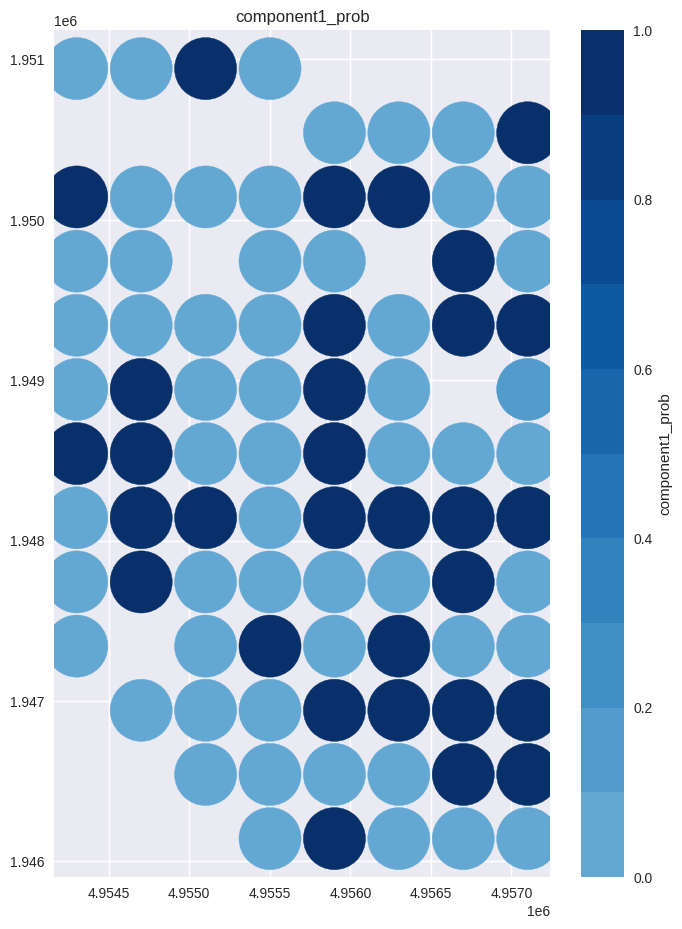

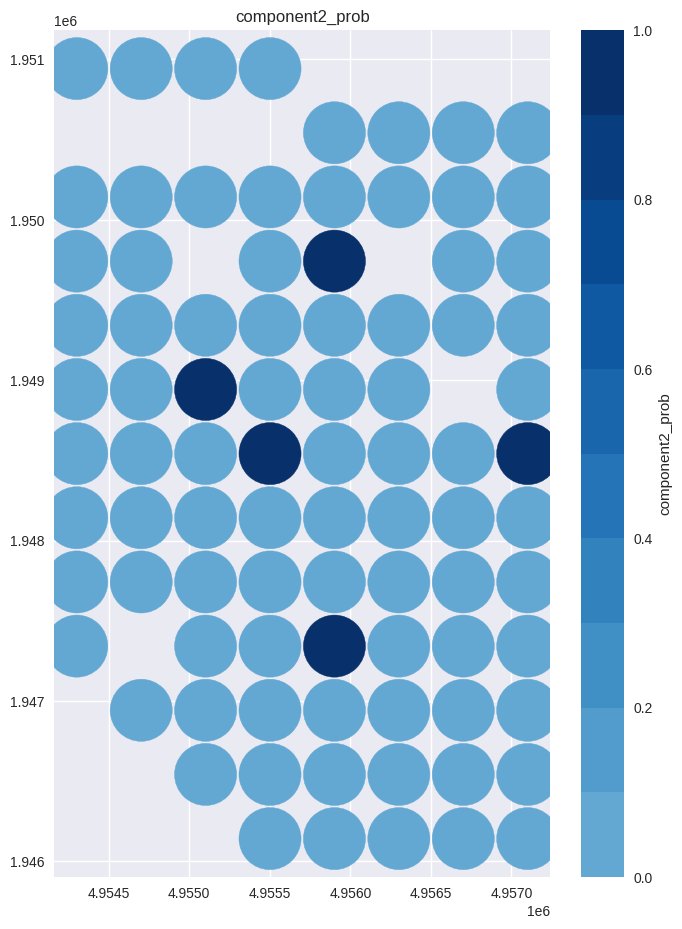

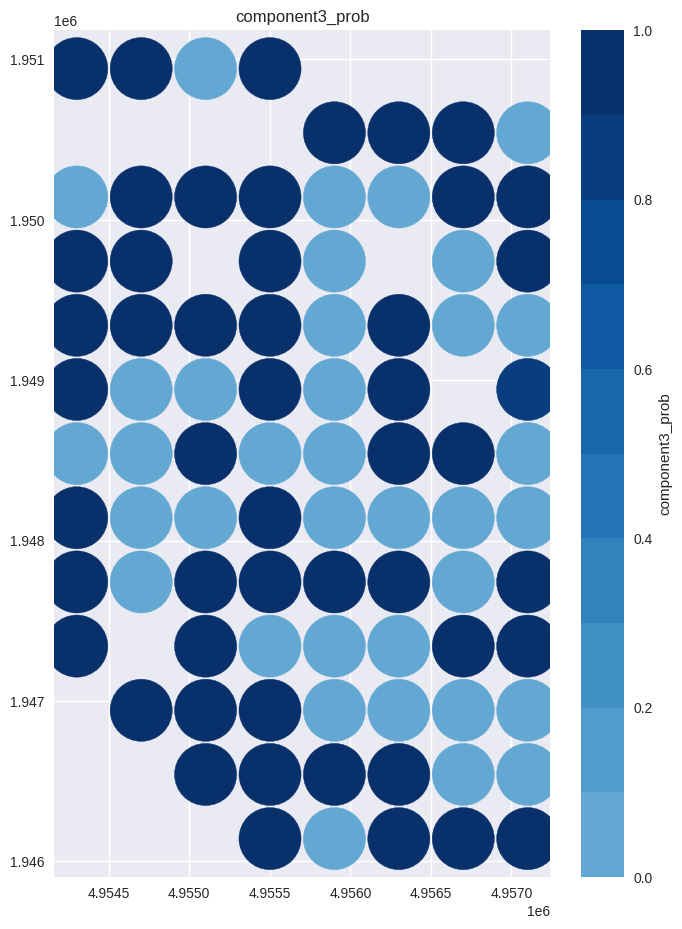

In [ ]:
for i in df.iloc[:,10:-2].columns:
  plotpointsgradient(df, i,'/content/drive/MyDrive/Doctorado/2024/Julio/0817/')

### 05-08 period

In [ ]:
mkdir /content/drive/MyDrive/Doctorado/2024/Julio/0508/

mkdir: cannot create directory ‘/content/drive/MyDrive/Doctorado/2024/Julio/0508/’: File exists


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Septiembre/mergeresults/0508.csv')

In [ ]:
df

,Unnamed: 0,site,EPS,BGNf,Hf,NDSI,rBA,ADI,AEI,pred,component1_prob,component2_prob,component3_prob,XCOORD.y_x,YCOORD.y_x
0,0,RZUA01,0.231659,0.614171,0.569808,0.825036,0.072990,0.996608,0.083011,0,1.000000e+00,0.0,1.485716e-171,4954301.250,1950942.625
1,2,RZUA03b,0.252562,0.937926,0.707006,0.868756,0.099528,0.980288,0.206662,0,1.000000e+00,0.0,3.416969e-48,4954301.247,1950142.624
2,3,RZUA04,0.025425,0.593775,0.534289,0.221639,0.004785,0.948771,0.330278,0,1.000000e+00,0.0,0.000000e+00,4954301.246,1949742.624
3,4,RZUA05,0.229935,0.499862,0.683358,0.838241,0.079637,0.998287,0.059222,0,1.000000e+00,0.0,1.970444e-137,4954301.244,1949342.624
4,5,RZUA06,0.121050,0.584752,0.569439,0.847942,0.085514,0.996017,0.092442,0,1.000000e+00,0.0,4.131236e-111,4954301.243,1948942.624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,RZUH09,0.280089,0.889752,0.254405,1.000000,1.000000,0.995036,0.103153,1,0.000000e+00,1.0,1.878216e-300,4957101.251,1947742.623
82,87,RZUH10,0.295856,0.517595,0.729806,0.709877,0.039253,0.999222,0.038404,0,1.000000e+00,0.0,0.000000e+00,4957101.251,1947342.623
83,88,RZUH11,0.283315,0.769751,0.642386,0.942196,0.214126,0.988976,0.150773,2,2.655795e-22,0.0,1.000000e+00,4957101.251,1946942.623
84,89,RZUH12,0.090820,0.755121,0.352238,0.343175,0.133890,0.000000,1.000000,0,1.000000e+00,0.0,0.000000e+00,4957101.251,1946542.623


In [ ]:
df.iloc[:,10:-2]

,component1_prob,component2_prob,component3_prob
0,1.000000e+00,0.0,1.485716e-171
1,1.000000e+00,0.0,3.416969e-48
2,1.000000e+00,0.0,0.000000e+00
3,1.000000e+00,0.0,1.970444e-137
4,1.000000e+00,0.0,4.131236e-111
...,...,...,...
81,0.000000e+00,1.0,1.878216e-300
82,1.000000e+00,0.0,0.000000e+00
83,2.655795e-22,0.0,1.000000e+00
84,1.000000e+00,0.0,0.000000e+00


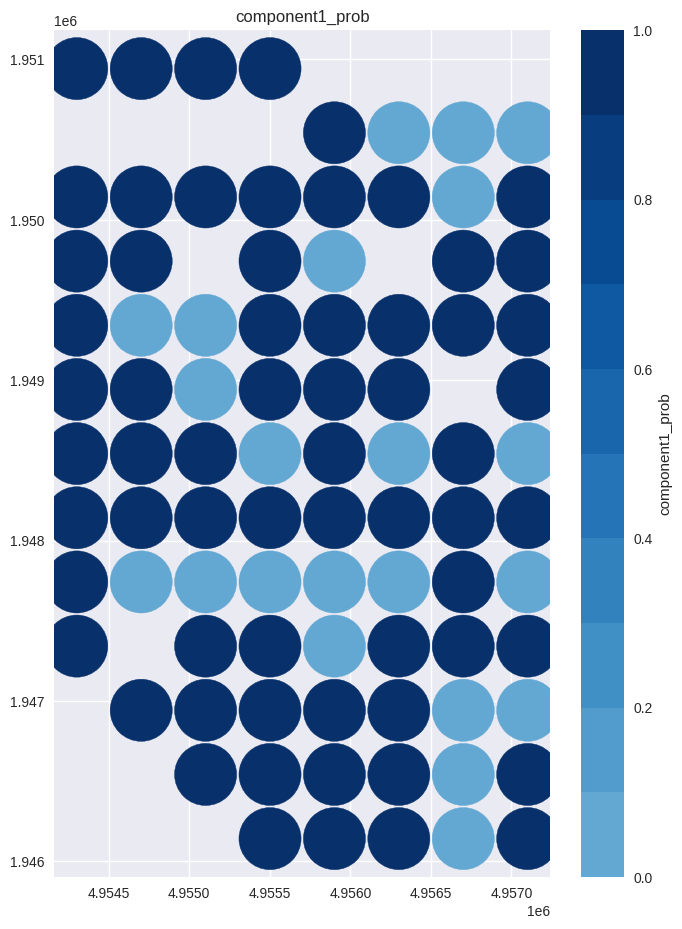

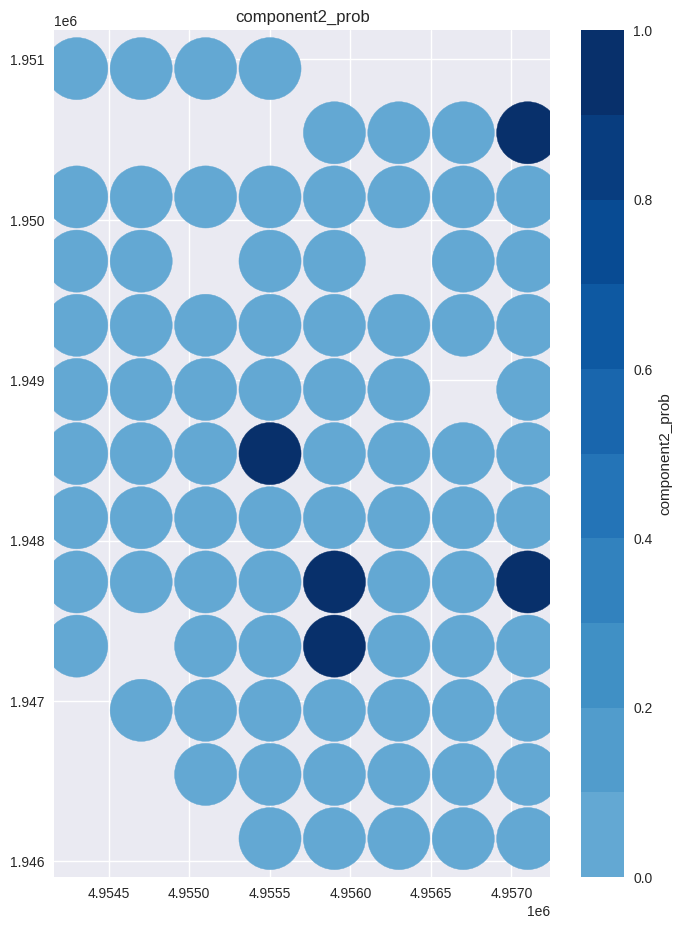

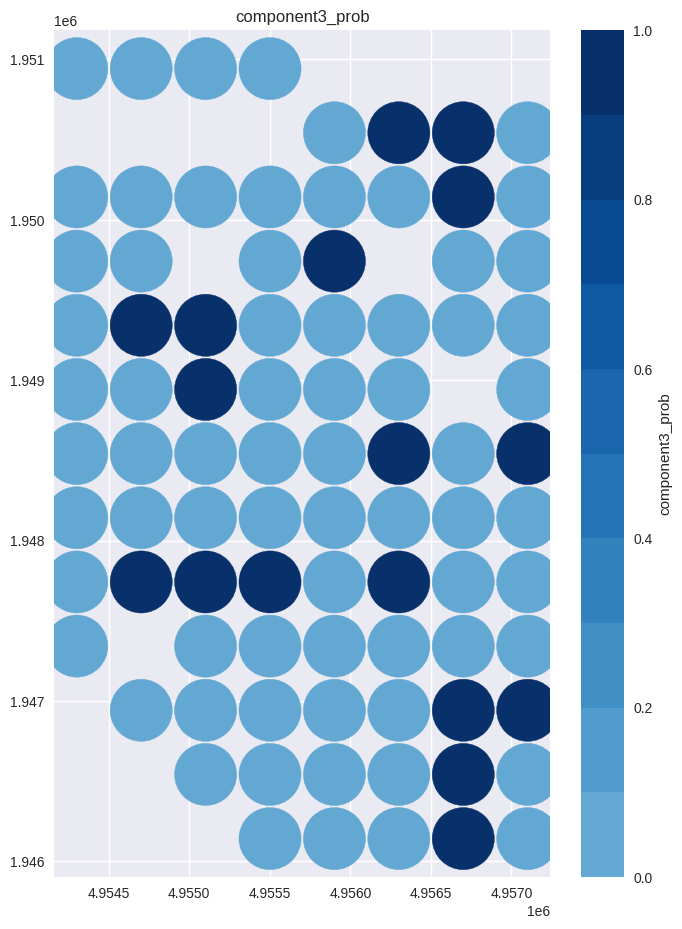

In [ ]:
for i in df.iloc[:,10:-2].columns:
  plotpointsgradient(df, i,'/content/drive/MyDrive/Doctorado/2024/Julio/0508/')

### 1720

In [ ]:
mkdir /content/drive/MyDrive/Doctorado/2024/Julio/1720/

mkdir: cannot create directory ‘/content/drive/MyDrive/Doctorado/2024/Julio/1720/’: File exists


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Septiembre/mergeresults/1720.csv')

In [ ]:
df

,Unnamed: 0,site,EPS,BGNf,Hf,NDSI,rBA,ADI,AEI,pred,component1_prob,component2_prob,component3_prob,component4_prob,XCOORD.y_x,YCOORD.y_x
0,0,RZUA01,0.334079,0.724879,0.419177,0.919372,0.197404,0.996105,0.062496,1,7.465868e-11,1.000000e+00,0.000000e+00,0.000000e+00,4954301.250,1950942.625
1,3,RZUA03b,0.279030,0.958834,0.646080,0.855978,0.113633,0.856853,0.390459,1,6.495266e-181,1.000000e+00,0.000000e+00,2.053149e-136,4954301.247,1950142.624
2,4,RZUA04,0.071381,0.597093,0.613000,0.425345,0.015715,0.987328,0.114010,3,0.000000e+00,3.442954e-28,0.000000e+00,1.000000e+00,4954301.246,1949742.624
3,5,RZUA05,0.266537,0.696890,0.456633,0.905063,0.170561,0.982094,0.135247,1,2.116084e-27,1.000000e+00,0.000000e+00,0.000000e+00,4954301.244,1949342.624
4,6,RZUA06,0.196581,0.597130,0.529354,0.890516,0.149260,0.993881,0.080085,1,6.971128e-52,1.000000e+00,0.000000e+00,3.378401e-297,4954301.243,1948942.624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,91,RZUH09,0.245479,0.825375,0.494971,0.966873,0.386339,0.938917,0.246280,0,1.000000e+00,2.303501e-34,9.098747e-65,0.000000e+00,4957101.251,1947742.623
82,92,RZUH10,0.334580,0.557674,0.502770,0.806115,0.082301,0.973440,0.160726,1,0.000000e+00,1.000000e+00,0.000000e+00,3.785237e-45,4957101.251,1947342.623
83,93,RZUH11,0.277441,0.960928,0.682788,0.680433,0.043911,0.855153,0.392108,1,0.000000e+00,9.999990e-01,0.000000e+00,9.849230e-07,4957101.251,1946942.623
84,94,RZUH12,0.282353,0.752359,0.514348,0.239585,0.006750,0.934981,0.255596,3,0.000000e+00,8.730109e-61,0.000000e+00,1.000000e+00,4957101.251,1946542.623


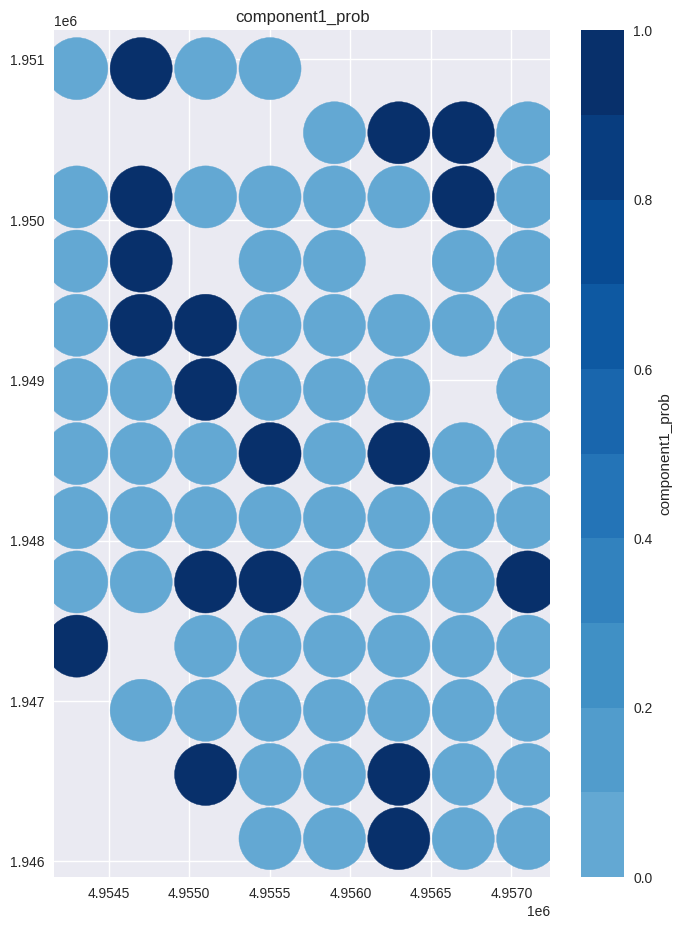

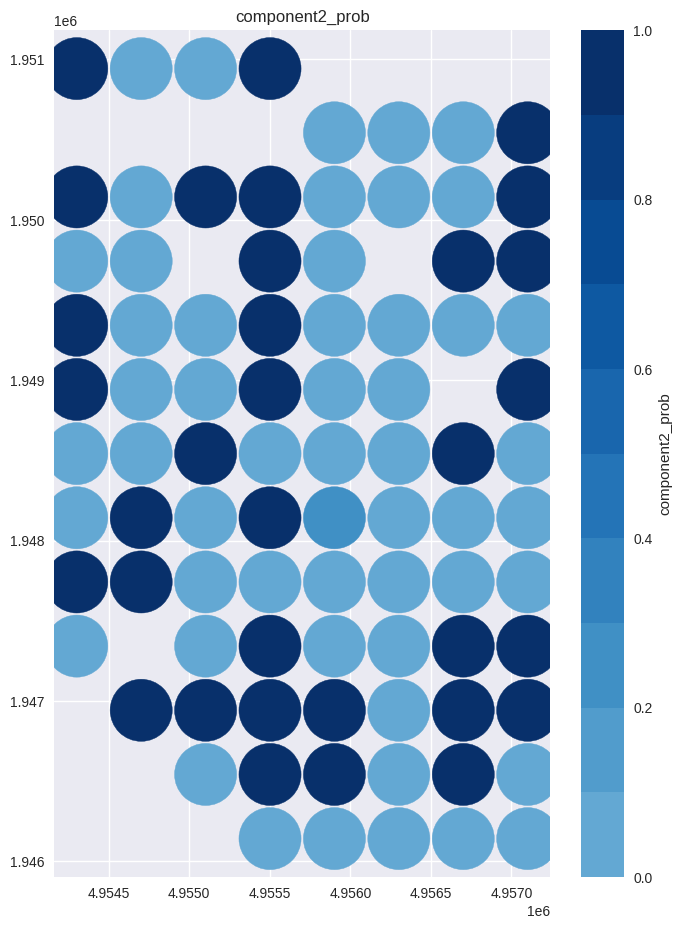

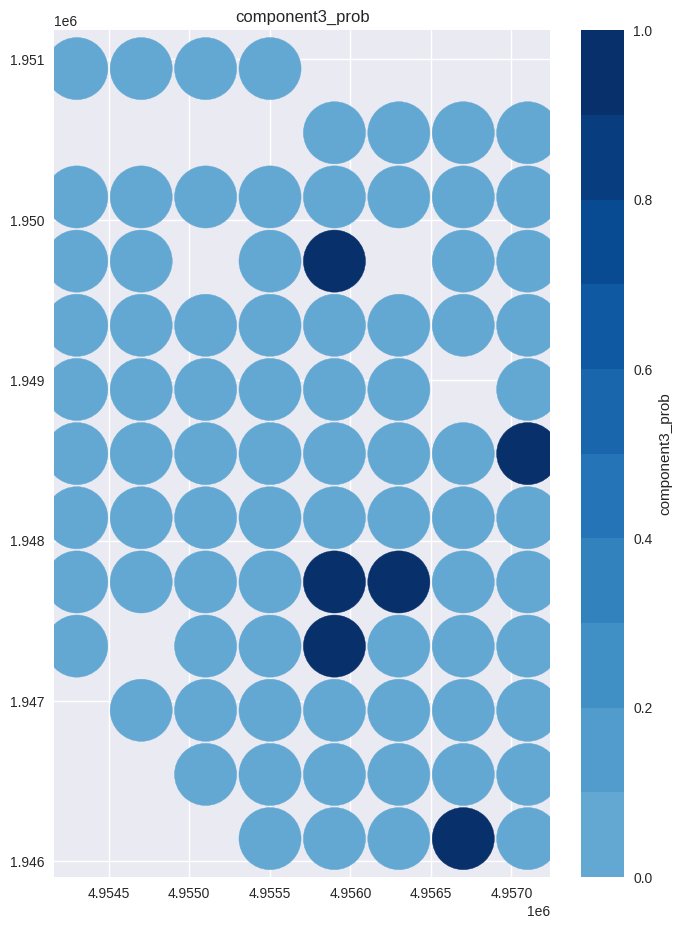

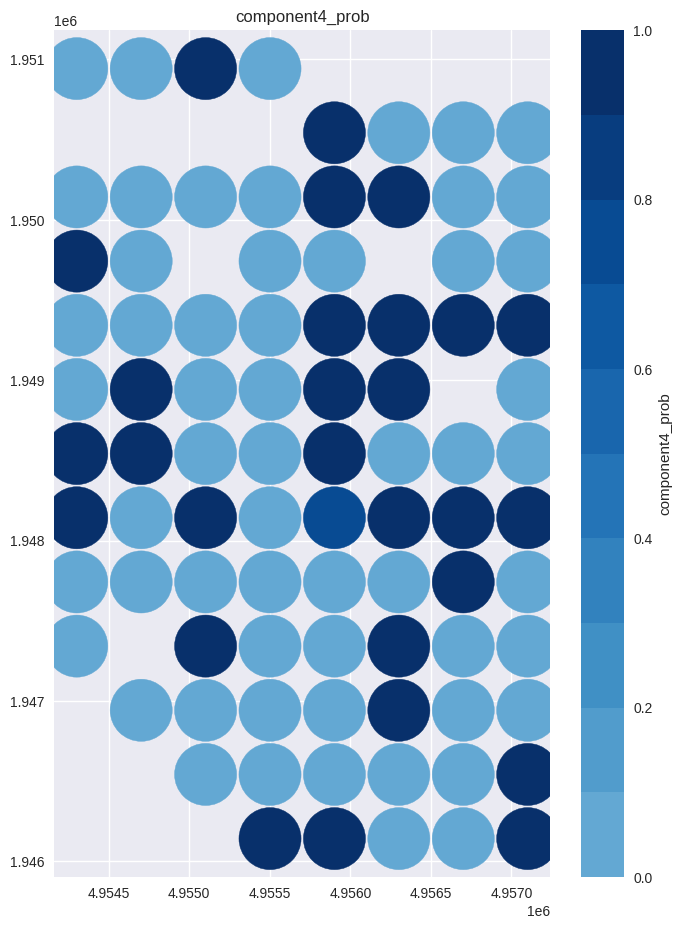

In [ ]:
for i in df.iloc[:,10:-2].columns:
  plotpointsgradient(df, i,'/content/drive/MyDrive/Doctorado/2024/Julio/1720/')

### 2005

In [ ]:
mkdir /content/drive/MyDrive/Doctorado/2024/Julio/2005/

mkdir: cannot create directory ‘/content/drive/MyDrive/Doctorado/2024/Julio/2005/’: File exists


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Doctorado/2023/Septiembre/mergeresults/2005.csv')

In [ ]:
df

,Unnamed: 0,site,EPS,BGNf,Hf,NDSI,rBA,ADI,AEI,pred,component1_prob,component2_prob,component3_prob,component4_prob,component5_prob,XCOORD.y_x,YCOORD.y_x
0,0,RZUA01,0.537138,0.683221,0.513614,0.940032,0.115922,0.998491,0.040079,1,5.480498e-146,1.000000,0.0,0.0,0.0,4954301.250,1950942.625
1,1,RZUA03b,0.290196,0.614063,0.578937,0.931250,0.101770,0.944243,0.235300,1,3.658164e-228,1.000000,0.0,0.0,0.0,4954301.247,1950142.624
2,2,RZUA04,0.152509,0.518235,0.571678,0.236275,0.002581,0.619622,0.658659,1,0.000000e+00,1.000000,0.0,0.0,0.0,4954301.246,1949742.624
3,3,RZUA05,0.337075,0.881055,0.472762,0.957677,0.159154,0.968003,0.180700,1,2.853957e-53,1.000000,0.0,0.0,0.0,4954301.244,1949342.624
4,4,RZUA06,0.315740,0.597999,0.570501,0.930293,0.100421,0.995778,0.067865,1,2.047282e-237,1.000000,0.0,0.0,0.0,4954301.243,1948942.624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,83,RZUH09,0.288775,0.859269,0.533156,0.993837,0.574324,0.961698,0.196126,2,3.579619e-48,0.000000,1.0,0.0,0.0,4957101.251,1947742.623
82,84,RZUH10,0.352814,0.610114,0.477616,0.936168,0.109270,0.874256,0.377804,1,1.098712e-181,1.000000,0.0,0.0,0.0,4957101.251,1947342.623
83,85,RZUH11,0.656671,0.635731,0.289940,0.972335,0.227190,0.897879,0.338780,1,2.239278e-03,0.997761,0.0,0.0,0.0,4957101.251,1946942.623
84,86,RZUH12,0.252676,0.826620,0.174736,0.397971,0.006947,0.247774,0.880433,1,0.000000e+00,1.000000,0.0,0.0,0.0,4957101.251,1946542.623


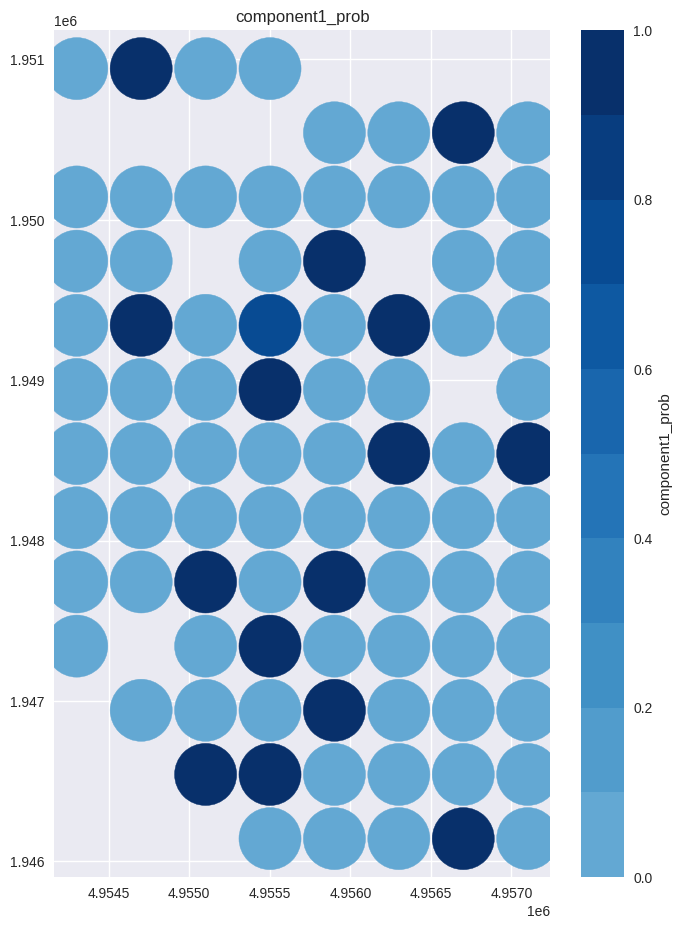

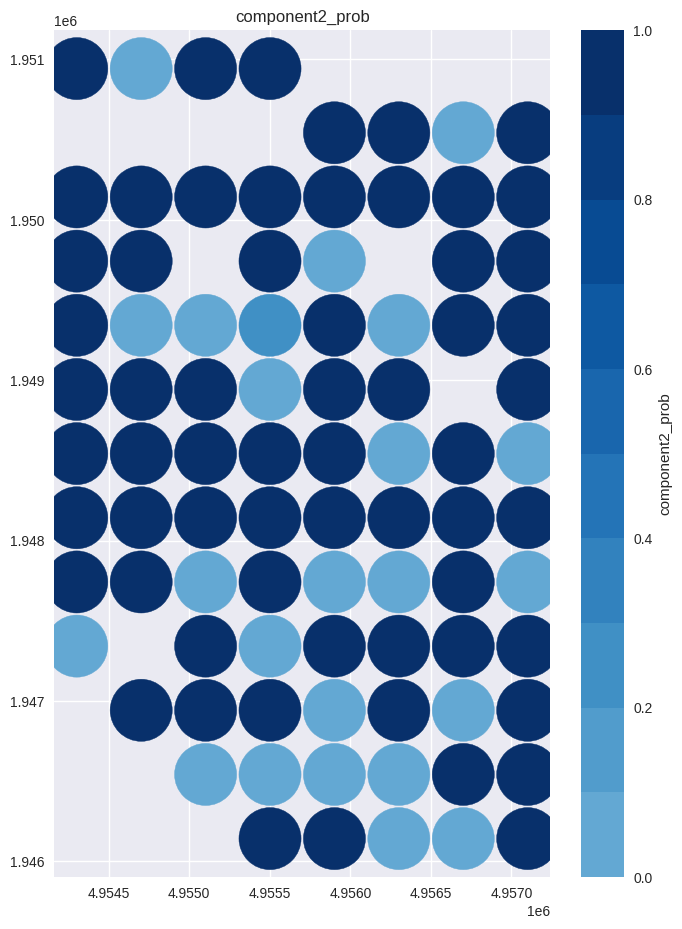

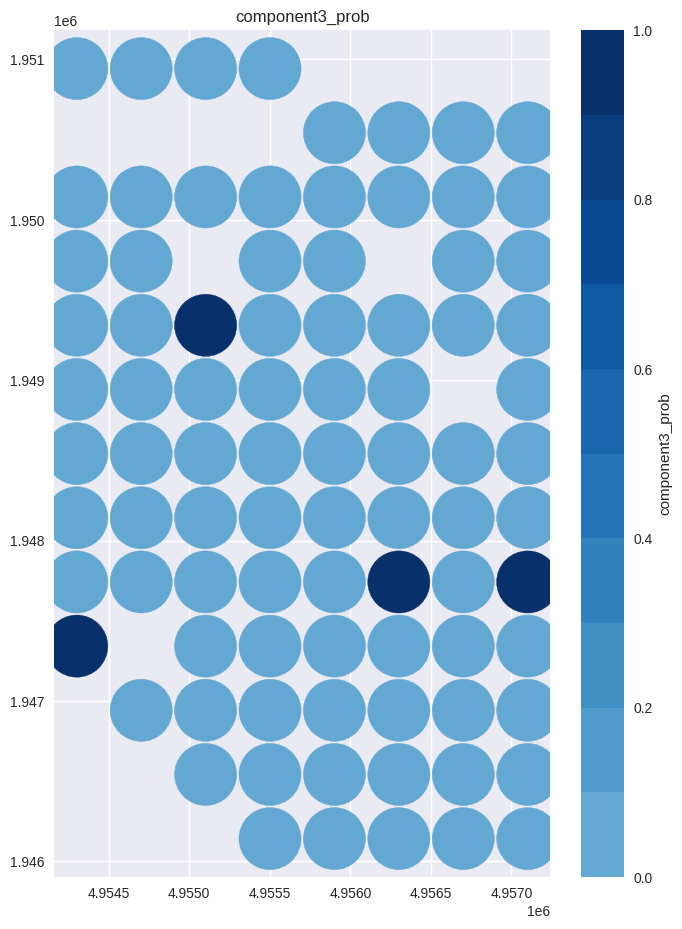

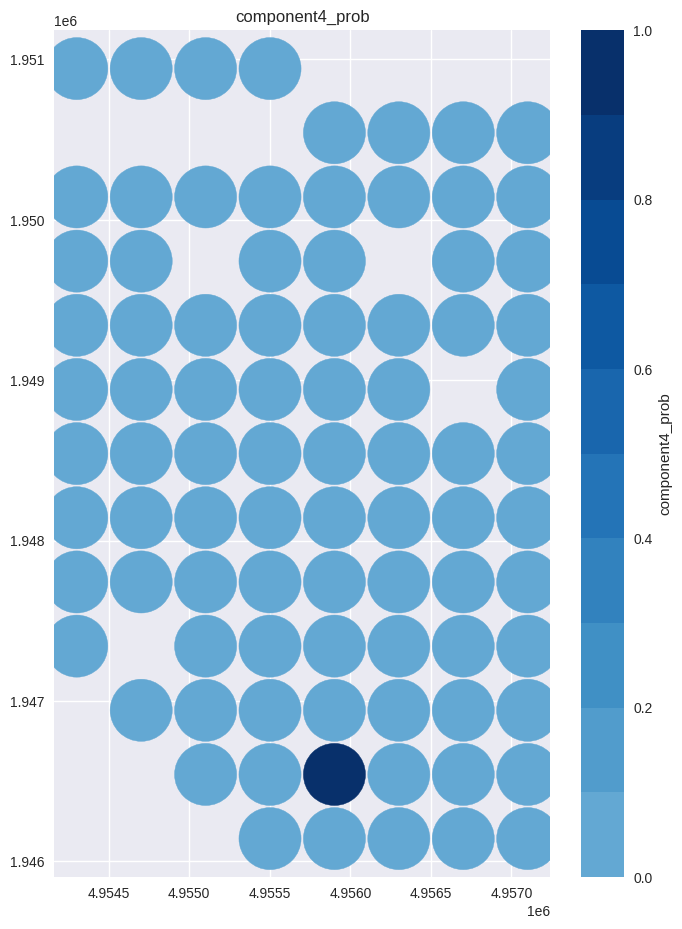

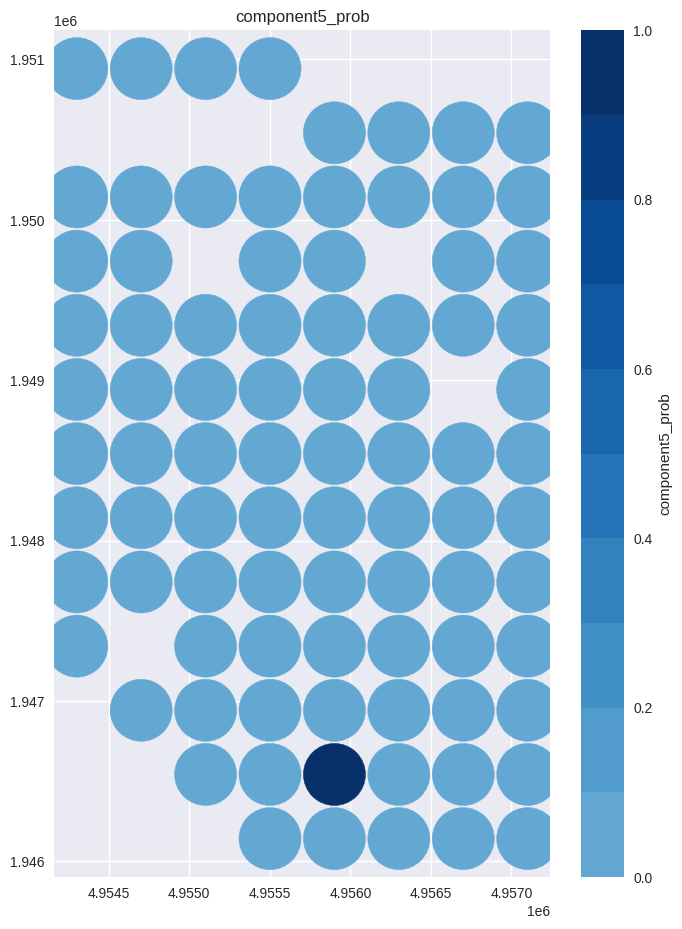

In [ ]:
for i in df.iloc[:,10:-2].columns:
  plotpointsgradient(df, i,'/content/drive/MyDrive/Doctorado/2024/Julio/2005/')